In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# Reading in the full image that will be searched
wally_rgb = cv2.imread('full_image.jpeg')
# Converting the rbg image into grayscale
wally_gray = cv2.cvtColor(wally_rgb, cv2.COLOR_BGR2GRAY)
# Loading in the image that will be used to scan the full image
temp = cv2.imread('waldo.png',0)
# Saving the width and height of the template for use in drawing the rectangle later
w, h = temp.shape[::-1]

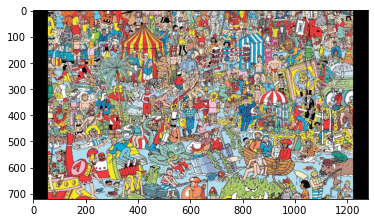

In [19]:
# Viewing the original image before any search
plt.imshow(cv2.cvtColor(wally_rgb, cv2.COLOR_BGR2RGB))

In [13]:
# Performing the template match
match = cv2.matchTemplate(wally_gray, temp, cv2.TM_CCOEFF_NORMED)
# Threshold for which matches > thresh will be outlined
thresh = 0.6
# Finding locations where value is greater than thresh
wally_loc = np.where(match >= thresh)
# Drawing rectangles by zipping x and y coords into a tuple
for point in zip(*wally_loc[::-1]):
    cv2.rectangle(wally_rgb, point, (point[0] + w, point[1] + h), (0,255,0), 2)
# Saving the output image    
cv2.imwrite('theres_wally.png', wally_rgb)

True

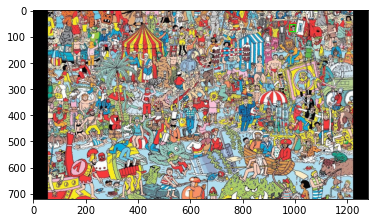

In [14]:
# Viewing final detection
plt.imshow(cv2.cvtColor(wally_rgb, cv2.COLOR_BGR2RGB))